In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
# print Dimesnions
print(f"Train Data: Number of Houses are: {train.shape[0]} and the number of features for each house are {train.shape[1]}")
print(f"Test Data: Number of Houses are: {test.shape[0]} and the number of features for each house are {test.shape[1]}")

Train Data: Number of Houses are: 891 and the number of features for each house are 12
Test Data: Number of Houses are: 418 and the number of features for each house are 11


In [5]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
177/891

0.19865319865319866

In [7]:
#drop column 'cabin' as more than 70% rows are null
train_1 = train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)
test_1 = test.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)

In [8]:
# print Dimesnions
print(f"Train Data: Number of Houses are: {train_1.shape[0]} and the number of features for each house are {train_1.shape[1]}")
print(f"Test Data: Number of Houses are: {test_1.shape[0]} and the number of features for each house are {test_1.shape[1]}")

Train Data: Number of Houses are: 891 and the number of features for each house are 8
Test Data: Number of Houses are: 418 and the number of features for each house are 7


In [9]:
 train_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
train_1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
train_1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
train_1['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
train_1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:

Sex_counts = train_1['Sex'].value_counts()


In [15]:
Sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

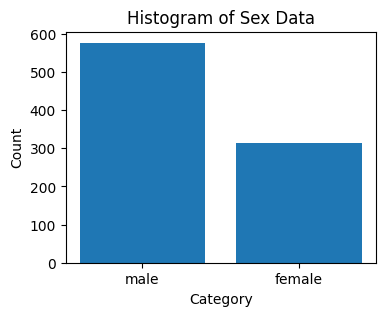

In [16]:
# Plotting
plt.figure(figsize=(4, 3))
plt.bar(Sex_counts.index, Sex_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Sex Data')
plt.show()

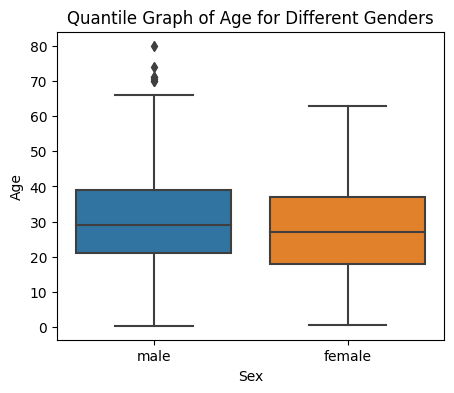

In [17]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Sex', y='Age', data=train_1)
plt.title('Quantile Graph of Age for Different Genders')
plt.show()

In [18]:
 train_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
train_1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
Replacement_nums ={
    "Sex": {"female": 1,"male": 0},
    "Embarked": {'S': 1, 'C':2, 'Q':3, 'nan' : 0},
}

In [21]:
train_2 = train_1.replace(Replacement_nums)
test_2 = test_1.replace(Replacement_nums)

In [22]:
train_2['Embarked'] = train_2['Embarked'].fillna(0)
test_2['Embarked'] = test_2['Embarked'].fillna(0)

In [23]:
train_2['Sex'].unique()

array([0, 1])

In [24]:
train_2['Embarked'].unique()

array([1., 2., 3., 0.])

In [25]:
train_2.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0


In [26]:
median_age_per_gender = train_1.groupby('Sex')['Age'].median()

In [27]:
train_2['Age'] = train_2['Age'].fillna(train_1['Sex'].map(median_age_per_gender))
test_2['Age'] = test_2['Age'].fillna(test_1['Sex'].map(median_age_per_gender))


In [28]:
median_age_per_gender

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [29]:
 train_2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
test_2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [31]:
train_2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [32]:
# def normalise_data(train_data, test_data):

#     print("Normalising numerical columns between 0 and 1....")
#     min_Age = train_data['Age'].min()
#     max_Age = train_data['Age'].max()

#     max_Fare = train_data['Fare'].max()
#     min_Fare = train_data['Fare'].min()
#     print(max_Fare, min_Fare)
#     train_data['Age'] = (train_data['Age'] - min_Age)/(max_Age-min_Age)
#     train_data['Fare'] = (train_data['Fare']  - min_Fare)/(max_Fare-min_Fare)

#     test_data['Age'] = (test_data['Age'] - min_Age)/(max_Age-min_Age)
#     test_data['Fare'] = (test_data['Fare']  - min_Fare)/(max_Fare-min_Fare)
    
#     print("Done")
#     return train_data, test_data


In [33]:
def normalise_data(train_data, test_data):

    print("Normalising numerical columns between 0 and 1....")
    min_ = train_data.min()
    max_ = train_data.max()

#     max_Fare = train_data['Fare'].max()
#     min_Fare = train_data['Fare'].min()
    print(min_, max_)
    train_data = (train_data - min_)/(max_-min_)

    test_data = (test_data - min_)/(max_-min_)    
    print("Done")
    return train_data, test_data


In [34]:
X = train_2.copy()
X = X.drop(columns=['Survived'])
Y = train_2['Survived']

In [35]:
X, test_2 = normalise_data(X, test_2)

Normalising numerical columns between 0 and 1....
Pclass      1.00
Sex         0.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
Embarked    0.00
dtype: float64 Pclass        3.0000
Sex           1.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
Embarked      3.0000
dtype: float64
Done


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [37]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,1.0,0.0,0.359135,0.25,0.0,0.045381,1.000000
309,0.0,1.0,0.371701,0.00,0.0,0.111118,0.666667
516,0.5,1.0,0.421965,0.00,0.0,0.020495,0.333333
120,0.5,0.0,0.258608,0.25,0.0,0.143462,0.333333
570,0.5,0.0,0.773813,0.00,0.0,0.020495,0.333333
...,...,...,...,...,...,...,...
715,1.0,0.0,0.233476,0.00,0.0,0.014932,0.333333
767,1.0,1.0,0.377984,0.00,0.0,0.015127,1.000000
72,0.5,0.0,0.258608,0.00,0.0,0.143462,0.333333
235,1.0,1.0,0.334004,0.00,0.0,0.014737,0.333333


# Logistic Regression

In [38]:
log_regr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [39]:
log_regr.score(X_train, y_train)

0.8033707865168539

In [40]:
log_regr.score(X_test, y_test)

0.7877094972067039

# Support Vector Machine

In [41]:
s_v_c = SVC(C = 15,random_state=0, tol=1e-5, max_iter = 10000, kernel = 'rbf').fit(X_train, y_train)

In [42]:
s_v_c.score(X_train, y_train)

0.8539325842696629

In [43]:
s_v_c.score(X_test, y_test)

0.7821229050279329

In [44]:
s_v_c = SVC()

In [45]:
param = {'C' : np.linspace(8,15,4),
              'max_iter' : [5000],
              'kernel': ['rbf'],
              'tol' : [1e-04, 1e-05, 1e-06]}

In [46]:
grid_search = GridSearchCV(estimator = s_v_c, param_grid=param, scoring='accuracy', n_jobs=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

GridSearchCV(estimator=SVC(), n_jobs=5,
             param_grid={'C': array([ 8.        , 10.33333333, 12.66666667, 15.        ]),
                         'kernel': ['rbf'], 'max_iter': [5000],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='accuracy', verbose=True)

In [47]:
print("The parameters with lowest Ecv error are: "+ str(grid_search.best_params_))
# Finding smallest cross-validation error
GRID_Results = pd.DataFrame(data=grid_search.cv_results_)
Ecv = 1 - GRID_Results[GRID_Results['rank_test_score']==1]['mean_test_score'].mean()
print(f"The error Ecv: {Ecv}")

The parameters with lowest Ecv error are: {'C': 12.666666666666668, 'kernel': 'rbf', 'max_iter': 5000, 'tol': 0.0001}
The error Ecv: 0.1586821629075149


In [48]:
grid_search.best_estimator_.score(X_train, y_train)

0.8539325842696629

In [49]:
grid_search.best_estimator_.score(X_test, y_test)

0.7821229050279329

In [50]:
yhat_train = grid_search.best_estimator_.predict(X_train)
yhat_test = grid_search.best_estimator_.predict(X_test)

In [51]:
accuracy_score(y_test, yhat_test)

0.7821229050279329

In [52]:
accuracy_score(y_train, yhat_train)

0.8539325842696629

In [53]:
avg_fare = test_2['Fare'].mean()
test_2['Fare'] = test_2['Fare'].fillna(avg_fare)
test_predict = grid_search.best_estimator_.predict(test_2)
result = pd.DataFrame(columns = ['PassengerId','Survived'])
result['PassengerId'] = test['PassengerId']
result['Survived'] = test_predict
result.to_csv('submission.csv', index=False , header = 1)

In [54]:
test_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Random Forest

In [55]:
random = RandomForestClassifier(n_estimators=50,max_depth=50, random_state=42).fit(X_train, y_train)

In [56]:
random.score(X_train, y_train)

0.9817415730337079

In [57]:
random.score(X_test, y_test)

0.7877094972067039

In [58]:
param = {'n_estimators' : [50, 100, 150, 200],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [2,3, 4],
          'criterion' :['gini', 'entropy']

          }

In [59]:
model = RandomForestClassifier(random_state=42)

In [60]:
grid_search = GridSearchCV(estimator = model, param_grid=param, scoring='accuracy',cv = 10, n_jobs=5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=True)

In [61]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [62]:
grid_search.best_estimator_.score(X_train, y_train)

0.8553370786516854

In [63]:
grid_search.best_estimator_.score(X_test, y_test)

0.776536312849162

# XGBoost

In [64]:
X_train.shape

(712, 7)

In [65]:
X_test.shape

(179, 7)

In [66]:
xgb_model = xgb.XGBRegressor( objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

In [67]:

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [68]:
xgb_model.score(X_train, y_train)

0.8791469484264276

In [69]:
xgb_model.score(X_test, y_test)

0.3144639386106325

In [70]:
xgb_model =  xgb.XGBRegressor( objective="binary:logistic", random_state=42)

In [71]:
params = {'n_estimators' : [150, 200, 250],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [2,3, 4],
          'criterion' :['gini', 'entropy']

          }

In [72]:
grid_search = GridSearchCV(estimator = xgb_model, param_grid=params, scoring='accuracy',cv = 5, n_jobs=5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:59:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:59:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:59:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:59:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:59:05] WARNING: /workspace/src/learner.cc:

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='binary:logistic', ...),
             n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [150, 200, 250]},
             scoring='accuracy', verbose=True)

In [73]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 150}

In [74]:
grid_search.best_estimator_.score(X_train, y_train)

0.6739198538148184

In [75]:
grid_search.best_estimator_.score(X_test, y_test)

0.3318447376050284